In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/Users/suicideboy/Desktop/Python Projects/Datasets/full.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [5]:
df.shape

(1309, 21)

In [6]:
cols = ['Pclass', 'Sex', 'Fare', 'Survived']
# columns from the titanic dataset that I wish to explore 

In [7]:
df1 = df[cols]

In [8]:
df1.dtypes

Pclass        int64
Sex          object
Fare        float64
Survived    float64
dtype: object

In [9]:
df1.isna().sum()
# obtaining the number of na values for each column

Pclass        0
Sex           0
Fare          1
Survived    418
dtype: int64

In [10]:
df1 = df1.dropna()

In [11]:
inputs = df1.drop('Survived', axis='columns')
output = df1['Survived']
inputs['Sex_n'] = LabelEncoder().fit_transform(inputs['Sex'])
inputs = inputs.drop(['Sex'], axis = 'columns')
# male has been substituted for 1 and female for 0 so that we can use the RandomForestClassifier
inputs

,Pclass,Fare,Sex_n
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1
...,...,...,...
886,2,13.0000,1
887,1,30.0000,0
888,3,23.4500,0
889,1,30.0000,1


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output,test_size = 0.2, random_state = 28) 

In [13]:
Y_test

287    0.0
621    1.0
395    0.0
273    0.0
155    0.0
      ... 
405    0.0
220    1.0
585    1.0
817    0.0
55     1.0
Name: Survived, Length: 179, dtype: float64

In [14]:
model = RandomForestClassifier(n_estimators = 60)

In [15]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=60)

In [16]:
model.score(X_test, Y_test)

0.8379888268156425

In [17]:
Y_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_pred)
# the confusion matrix tells us whether our predicted values have been predicted correctly


array([[101,  14],
       [ 15,  49]])

In [18]:
model.predict([[1,50,0]])
# my model predicts that a female travelling in 1st class with a ticket fare of £50 will survive
# survival is represented by 1 and death by 0

array([1.])

In [19]:
print(model.predict([[3,9.5,1]]))
print(model.predict_proba([[3,9.5,1]]))
# my model predicts that a male travelling in 3rd class with a £9.50 ticket will not survive
# the probabilities for death and survival are also displayed

[0.]
[[0.70708153 0.29291847]]


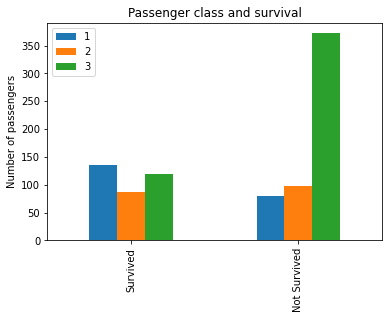

In [20]:
survived = df[df['Survived'] == 1]['Pclass'].value_counts()
n_survived = df[df['Survived'] == 0]['Pclass'].value_counts()
pclass = pd.DataFrame([survived, n_survived])
pclass.index = ['Survived', 'Not Survived']
pclass.plot(kind = 'bar')
plt.title('Passenger class and survival')
plt.ylabel('Number of passengers')
plt.show()

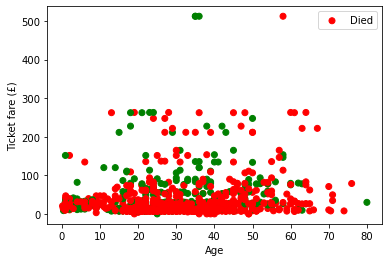

In [22]:
df2 = df[['Fare', 'Age', 'Survived']]
col = np.where(df2['Survived'] == 1, 'g', 'r')
handles = ['Survived', 'Died']
plt.scatter(df2['Age'], df2['Fare'], c = col)
plt.legend(['Died','Survived'])
plt.ylabel('Ticket fare (£)')
plt.xlabel('Age')
plt.show()
# a scatter plot to show the ages and ticket fares for customers
# it also tells us whether the passenger survived or not (red for death, green for survival)